In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def high_boost_filter(image, mask, k):
    # Aplicar a máscara à imagem para criar a máscara de nitidez
    mask_image = cv2.filter2D(image, -1, mask)
    
    # Calcular a máscara de nitidez
    mask = image - mask_image

    # Aplicar o alto reforço à imagem original
    sharpened = image + k * mask

    # Certifique-se de que os valores da imagem estejam no intervalo [0, 255]
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened

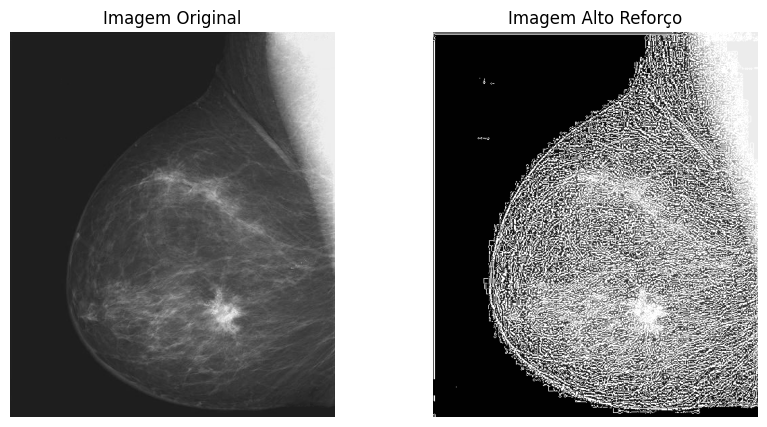

In [3]:
path = "./DIP3E_Original_Images_CH03/"
# Carregar a imagem em formato .tif
image = cv2.imread(f'{path}Fig0304(a)(breast_digital_Xray).tif', cv2.IMREAD_GRAYSCALE)

# Definir a máscara personalizada (exemplo: filtro de média)
custom_mask = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]], dtype=np.float32)

# Definir o valor de k (fator de alto reforço)
k = 2.0

# Aplicar a função com a máscara personalizada
sharpened_image = high_boost_filter(image, custom_mask, k)

# Exibir a imagem resultante com Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Imagem Original'), plt.axis('off')
plt.subplot(122), plt.imshow(sharpened_image, cmap='gray')
plt.title('Imagem Alto Reforço'), plt.axis('off')

plt.show()